In [1]:
import numpy as np
import pandas as pd                   #Importing Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Churn_Modelling.csv")  #Importing Dataset
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

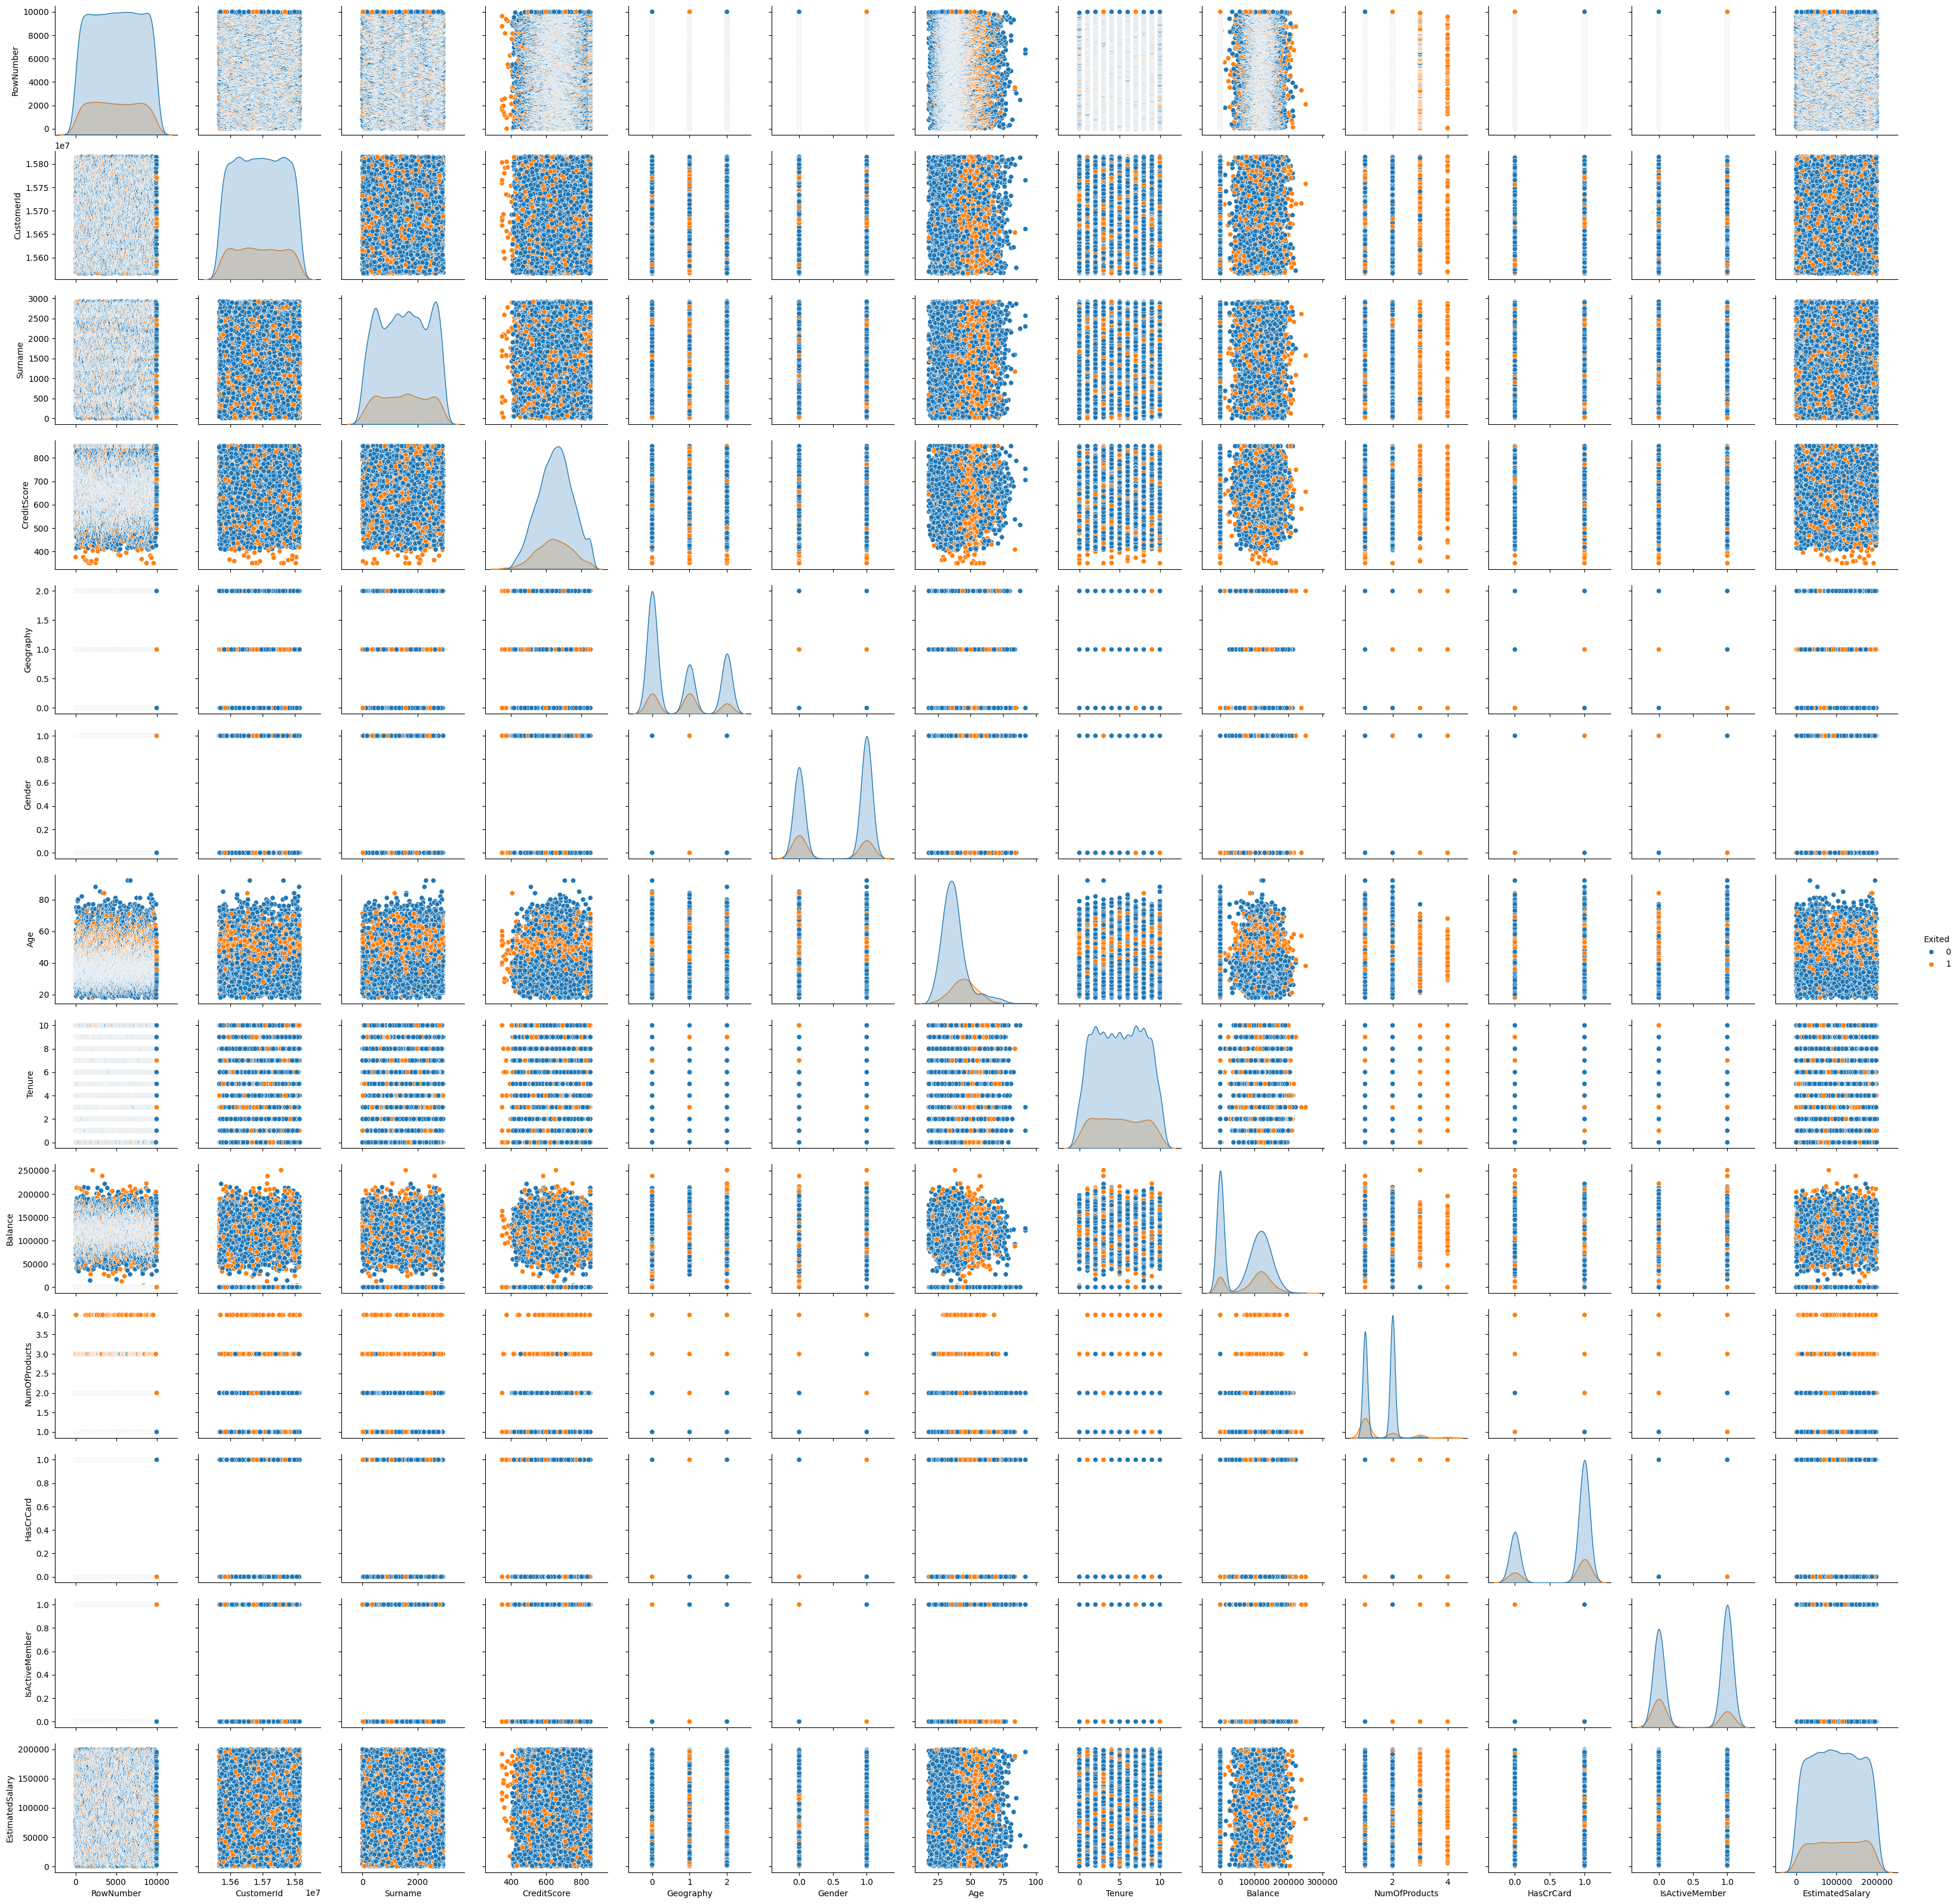

In [60]:
sns.pairplot(df,hue="Exited")
plt.show()

In [4]:
#Using Nominal Encoding for all categorical columns to convert in numerical column bcuz model can't work on categorical data


from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
label_encoder_arr={}
for i in df.select_dtypes(include=['object']).columns:
 la = LabelEncoder()
 df[i]=la.fit_transform(df[i],inplace=True)
 label_encoder_arr[i] = la


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']


# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)     #Checking rows of Training Dataset
print(y_train.shape)

(8000, 10)
(8000,)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#Scaling Data to put Dataset in Normal Distribution
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Of Model: ",acc)

Accuracy Of Model:  0.866


In [39]:
#Confusion Matrix for Random Forest

rf_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', rf_cm)

Confusion Matrix:
 [[1547   60]
 [ 208  185]]


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Scaling Data to put Dataset in Normal Distribution
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr.predict(X_test_scaled)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy Of Model:", acc)

Accuracy Of Model: 0.8155


In [41]:
   #Confusion Matrix for Logistic Regression

lr_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', lr_cm)

Confusion Matrix:
 [[1559   48]
 [ 321   72]]


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, random_state=42)

# Scale the original features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using scaled features
gb.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = gb.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Of Model (All features):", acc)


Accuracy Of Model (All features): 0.862


In [47]:
from imblearn.over_sampling import SMOTE
                                              #Using SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Then train:
gb.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, random_state=42)

In [43]:
#Confusion Matrix for Gradient Boost

gb_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', gb_cm)

Confusion Matrix:
 [[1527   80]
 [ 196  197]]


In [58]:

user_input = input("Enter 10 feature values separated by commas:\n ")  # CreditScore, Geography(France = 0,Germany = 1 ,
                                                                        # Spain = 2 ),
                                                                        # Gender(Female = 0,Male = 1), Age,
                                                                        # Tenure, Balance, NumOfProducts, HasCrCard,
                                                                        # IsActiveMember,EstimatedSalary)

# Convert input string to float numpy array
user_features = np.array([float(i) for i in user_input.split(',')]).reshape(1, -1)

# Scale the input using the scaler fitted on training data
user_features_scaled = scaler.transform(user_features)

# Predict
prediction = gb.predict(user_features_scaled)

# Output result
if prediction[0] == 0:
    print("\n\nCustomer Has not Churned(Exited)\n\n")
else:
    print("\n\nCustomer Has Churned(Exited)\n\n")


Enter 10 feature values separated by commas:
 650,1,1,40,5,50000,1,1,1,60000


Customer Has not Churned(Exited)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
